# Haberman's Survival EDA Assignment

### overview on the dataset:
Donor: 
Tjen-Sien Lim

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.


Attribute Information:

1. Age of patient at time of operation (numerical) 
2. Patient's year of operation (year - 1900, numerical) 
3. Number of positive axillary nodes detected (numerical) 
* . Survival status (class attribute) 

-- 1 = the patient survived 5 years or longer

-- 2 = the patient died within 5 year

##### Problem  to solve:
Perform a Exploratory Data Analysis on this dataset and note the observations made during


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

haberman = pd.read_csv("haberman.csv")
#print(haberman)

In [2]:
print (haberman.shape)
print (haberman.columns)
haberman.describe()

(306, 4)
Index(['Age', 'Operation_Year', 'axil_nodes', 'Surv_status'], dtype='object')


,Age,Operation_Year,axil_nodes,Surv_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [3]:
haberman["Surv_status"].value_counts()

1    225
2     81
Name: Surv_status, dtype: int64

#### observation:
* The data set is not balanced. i.e the total number of data points having same class variables class label
* Total number of Data points in the given data set are 306
* max age of the patient present in this data set is 83 years
* Max number of axial_nodes present on single person is 52

In [4]:
col = [x for x in haberman.columns]
print(col)
print(col[:3])

['Age', 'Operation_Year', 'axil_nodes', 'Surv_status']
['Age', 'Operation_Year', 'axil_nodes']


## Univaraite analysis



/home/gateway/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/gateway/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


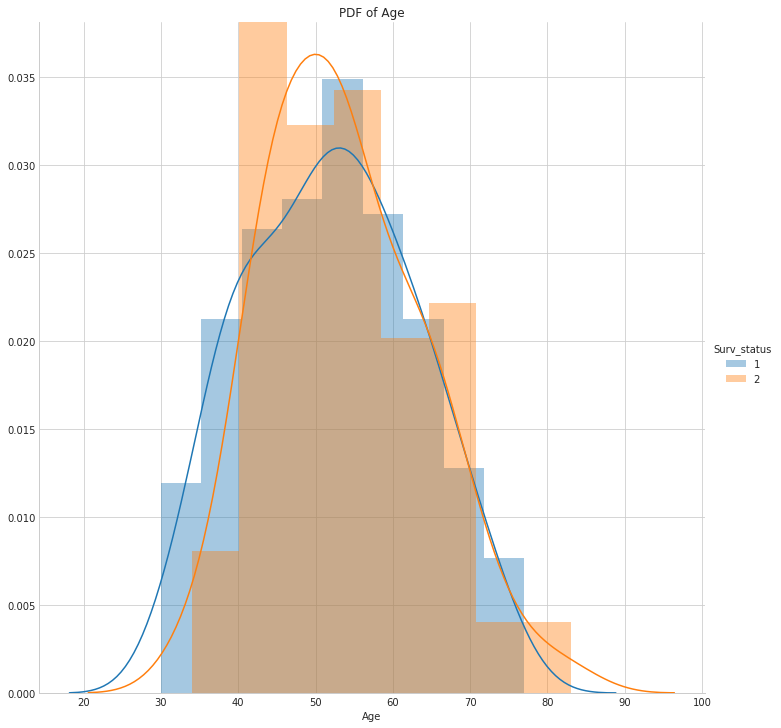

In [5]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="Surv_status", size=10).map(sns.distplot, "Age").add_legend()
plt.title("PDF of Age")
plt.show()





#### observation:
In this PDF both the classes distributions are overlapping one over the other hence we can't conclude at this PDF

/home/gateway/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/gateway/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


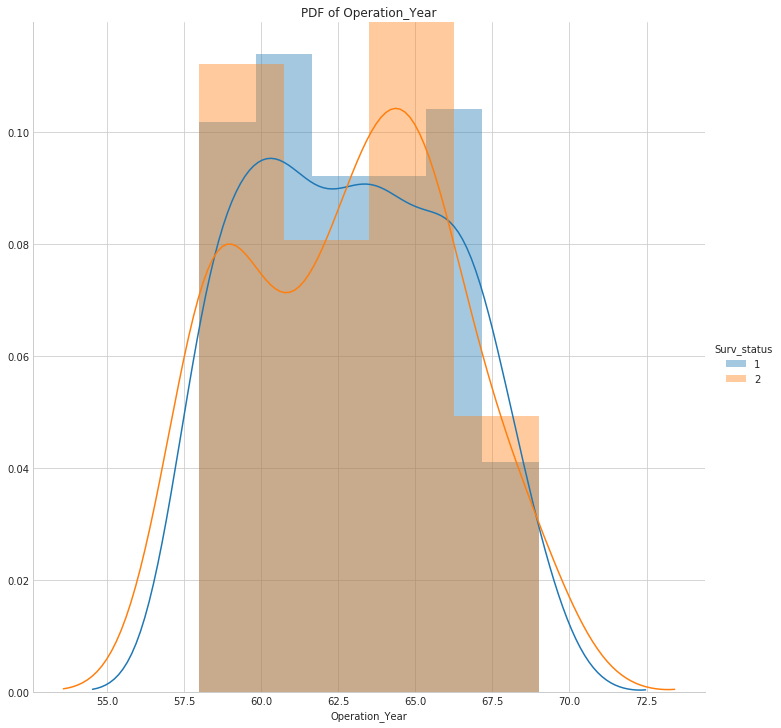

In [6]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="Surv_status", size=10).map(sns.distplot, "Operation_Year").add_legend();
plt.title("PDF of Operation_Year")
plt.show();

#### observation: 
* Even in this PDF both the survival status 1 & 2 overlap one over the other hence it is very difficult to predict hence year of operation is not the correct feature to classify the survival status by looking at the operation year feature

/home/gateway/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/gateway/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


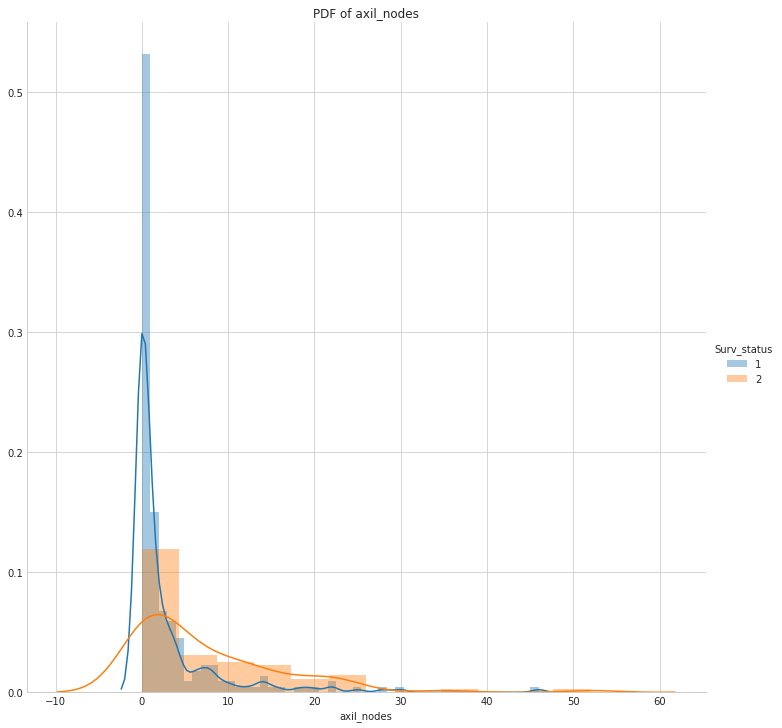

In [7]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="Surv_status", size=10).map(sns.distplot, "axil_nodes").add_legend()
plt.title("PDF of axil_nodes")
plt.show()

#### observation:
*  By looking at the axil_node graph we can understand that majority of the people have survived after 5 years have 2 to 3 axil_node

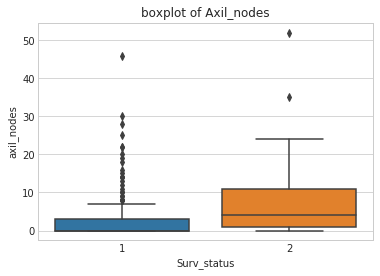

In [8]:
sns.set_style("whitegrid");
sns.boxplot(x='Surv_status',y='axil_nodes', data=haberman)
plt.title("boxplot of Axil_nodes")
plt.show()

#### observation:
* In this boxplot the max value or the top most whisker with class label 1 is at 7. So if the number of axil_nodes is above 7 then the chances of not being survived is 100%

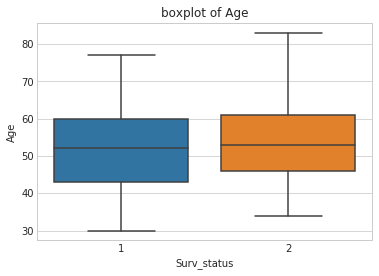

In [9]:
sns.boxplot(x='Surv_status',y='Age', data=haberman)
plt.title("boxplot of Age")
plt.show()

#### observation:
* The min value with survival state 2 is around 37.So if the patient age is below 37 years then the chances of survival will be close to 100%
* The max value of with survival state 1 is around 78.So if the patient age is above 78 years then the chances of not being survived will be close to 100%

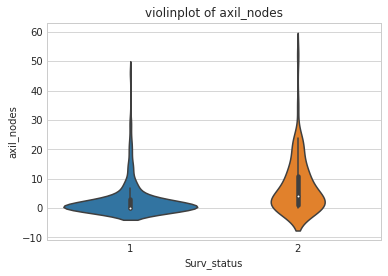

In [10]:
sns.violinplot(x="Surv_status", y="axil_nodes", data=haberman, size=8)
plt.title("violinplot of axil_nodes")
plt.show()

#### observation:
* The spread or standard deviation of axil_node is relatively much small for the survived sample of data when compared to the the not_survived class

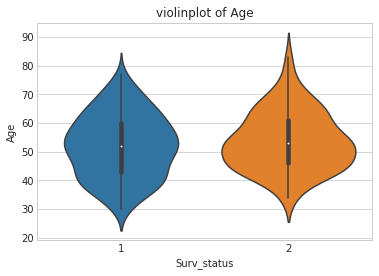

In [11]:
sns.violinplot(x="Surv_status", y="Age", data=haberman, size=8)
plt.title("violinplot of Age")
plt.show()

#### observation:
* The probability of the patients is very high around 50 years

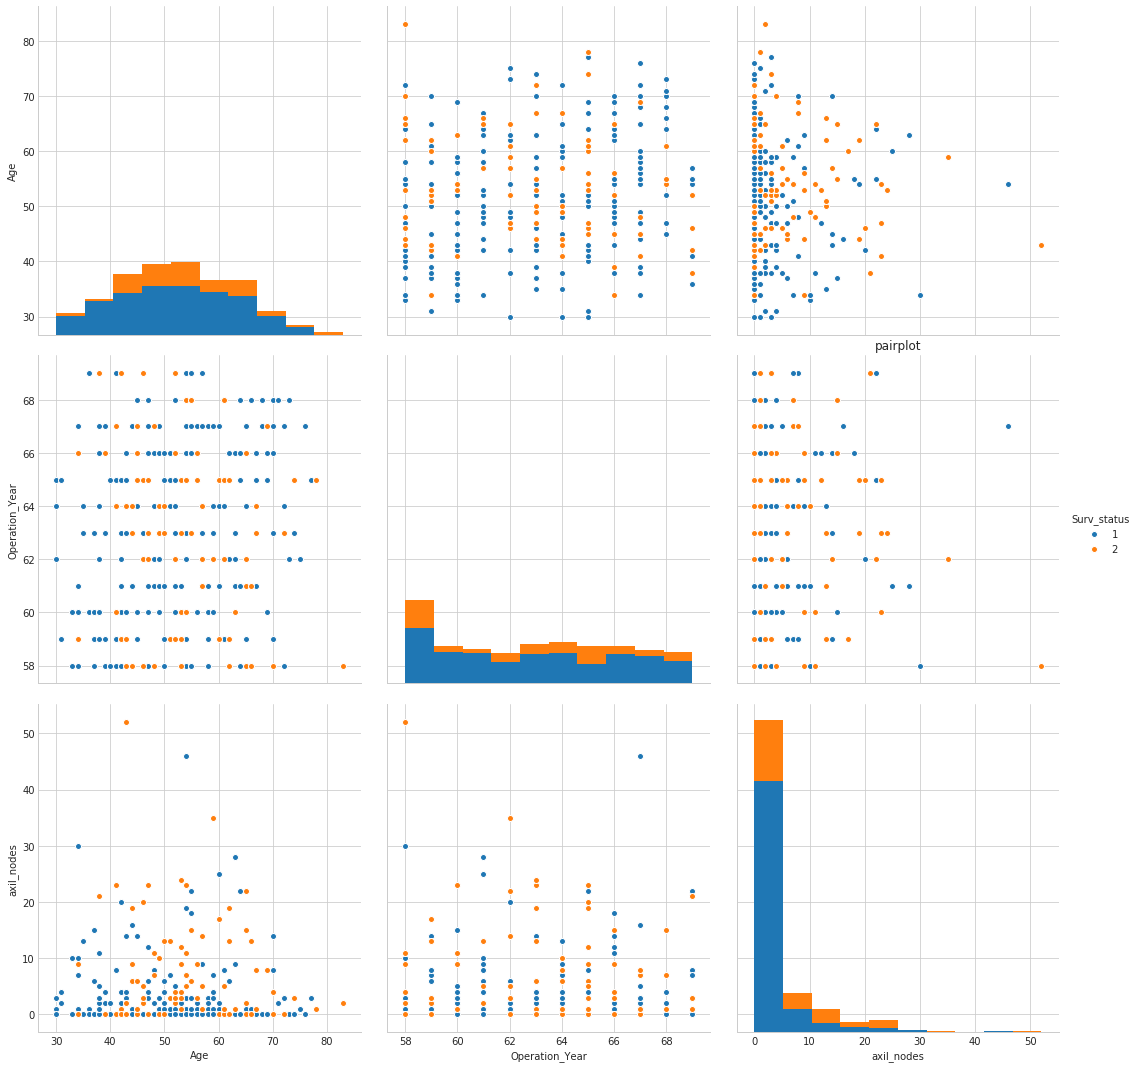

In [12]:
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="Surv_status",vars=col[:3],size =5)
plt.title("pairplot")
plt.show()

#### observation:
* Using this pair plot we can understand that choosing the Age and axil_node will give good understanding in visualizing the data

# Age-axil_node Scatter plot

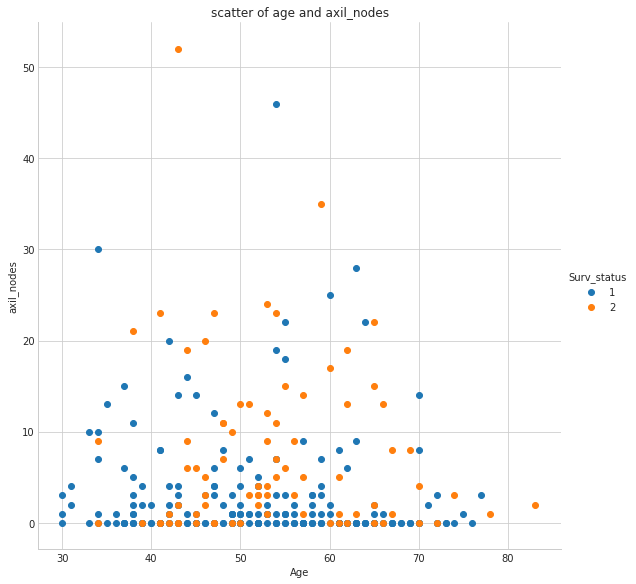

In [13]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="Surv_status", size=8).map(plt.scatter, "Age", "axil_nodes").add_legend()
plt.title("scatter of age and axil_nodes")
plt.show()

#### observation:
* we can notice that most of the data points which fall in the age group below 40 are having survival status as 1. So in order to get a good insight on it I am making the following analysis on the data points

In [14]:
survived = haberman.loc[haberman['Surv_status']== 1]
not_survived = haberman.loc[haberman['Surv_status'] == 2]

In [15]:
suv_less_40=survived.loc[survived['Age']<=40].count().Age
not_suv_less_40=not_survived.loc[not_survived['Age']<=40].count().Age
suv_less_40/(suv_less_40+not_suv_less_40)*100

90.69767441860465

In [16]:
suv_less_gt40=survived.loc[survived['Age']>40].count().Age
not_suv_less_gt40=not_survived.loc[not_survived['Age']>40].count().Age
suv_less_gt40/(suv_less_gt40+not_suv_less_gt40)*100

70.72243346007605

#### observations:
* The probability of a patient getting survived whose age is less than 40 years is 90%
* The probability of a patient getting survived with age greater than 40 years is 70.7%

# 3-D Scatter plot

In [17]:
import plotly
plotly.tools.set_credentials_file(username='ravitejathumnoori', api_key='Ae3Mq7JiZeUaCzctrmwu')

import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np
x,y,z=survived['Age'],survived['Operation_Year'],survived['axil_nodes']
trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    name='survived'
)
x2,y2,z2=not_survived['Age'],not_survived['Operation_Year'],not_survived['axil_nodes']
trace2 = go.Scatter3d(
    x=x2,
    y=y2,
    z=z2,
    mode='markers',
    name='not_survived'
)
data = [trace1, trace2]
layout = go.Layout(
    title='Iris dataset',
    scene = dict(
        xaxis = dict(
            title='Age'),
        yaxis = dict(
             title='Operation_Year'),
        zaxis = dict(
             title='axil_nodes'),),
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='legend-names')




#### observation:
* most of the points are in close to the X,Y plane and hence with low number of axil_nodes containing patients will have more possibility to get cured.